In [23]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')
print("Done")
#loading the save numpy arrays in the previous code

Done


In [24]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#The first CNN layer followed by Relu and MaxPooling layers


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer followed by Relu and MaxPooling layers


model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer

model.add(Dense(50,activation='relu'))


model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print("Done")


Done


In [25]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)
print("Done")


Done


In [26]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)
model.save("Face_Model/Models/{NAME}.model")
model.save('keras.h5')
print("Done")


Epoch 1/20
31/31 [==============================] - 140s 4s/step - loss: 0.8517 - accuracy: 0.5209 - val_loss: 0.6484 - val_accuracy: 0.5656
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
31/31 [==============================] - 129s 4s/step - loss: 0.6336 - accuracy: 0.6193 - val_loss: 0.4532 - val_accuracy: 0.8033
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
31/31 [==============================] - 121s 4s/step - loss: 0.4876 - accuracy: 0.7700 - val_loss: 0.4868 - val_accuracy: 0.7500
Epoch 4/20
31/31 [==============================] - 116s 4s/step - loss: 0.4154 - accuracy: 0.8127 - val_loss: 0.3259 - val_accuracy: 0.8607
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
31/31 [==============================] - 117s 4s/step - loss: 0.2820 - accuracy: 0.8907 - val_loss: 0.3160 - val_accuracy: 0.8607
INFO:tensorflow:Assets written to: model-005.model\assets
Epoch 6/20
31/31 [==============================] - 116s 4s/ste

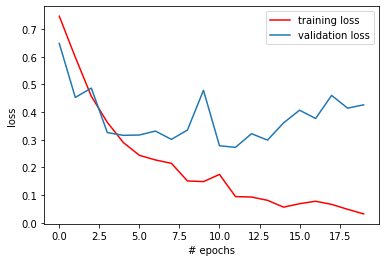

In [27]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

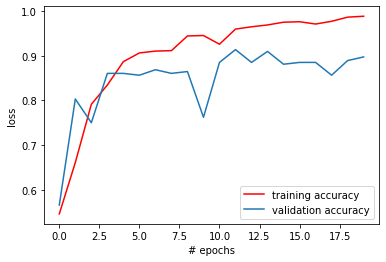

In [28]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [29]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 4s 806ms/step - loss: 0.4143 - accuracy: 0.8750
[0.41433000564575195, 0.875]
